In [1]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd
# Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')
# Import Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w')
# Importing Scikit Learn Libraries
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
# Importing Dataset using Pandas Function

df = pd.read_csv('bank.csv',sep =';')

df.sample(frac = 1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4229,62,self-employed,divorced,tertiary,no,6,yes,no,cellular,13,oct,216,1,183,4,success,yes
4298,26,admin.,single,secondary,no,3529,no,yes,cellular,7,sep,57,2,-1,0,unknown,no
1416,38,blue-collar,single,secondary,no,578,yes,no,unknown,21,may,112,2,-1,0,unknown,no
1658,47,blue-collar,married,primary,no,556,yes,no,cellular,4,feb,147,2,264,4,other,no
968,33,management,single,tertiary,no,1909,no,no,cellular,8,aug,191,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,38,entrepreneur,married,secondary,no,157,no,yes,cellular,15,may,57,11,366,1,other,no
3350,31,admin.,married,secondary,no,389,yes,no,cellular,7,dec,69,1,185,2,failure,no
660,36,technician,divorced,secondary,no,666,yes,yes,cellular,3,apr,190,1,133,1,other,no
4238,36,technician,single,tertiary,no,197,no,no,cellular,30,apr,260,1,-1,0,unknown,yes


In [3]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
# Evaluate Descriptive Stats: EDA

# Step 1: Segregate Categorical columns and Numeical Columns
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(include = ['int64','float64'])

In [5]:
# Step2 : Evaluate Descriptive Stats

from collections import OrderedDict

stats= []

for i in numerical_col.columns:
  numerical_stats = OrderedDict({
      'Feature':i,
      'Mean':df[i].mean(),
      'Median':df[i].median(),
      'Mode':df[i].mode()[0],
      'Minimum':df[i].min(),
      'Maximum':df[i].max(),
      'Standard Deviation':df[i].std(),
      'Variance':df[i].var(),
      'Skewness':df[i].skew(),
      'Kurtosis':df[i].kurt(),
      'Q1':df[i].quantile(0.25),
      'Q3':df[i].quantile(0.75),
      'IQR':df[i].quantile(0.75)-df[i].quantile(0.25)

  })
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)

report



,Feature,Mean,Median,Mode,Minimum,Maximum,Standard Deviation,Variance,Skewness,Kurtosis,Q1,Q3,IQR
0,age,41.170095,39.0,34,19,87,10.576211,1.118562e+02,0.699501,0.348775,33.0,49.0,16.0
1,balance,1422.657819,444.0,0,-3313,71188,3009.638142,9.057922e+06,6.596431,88.390332,69.0,1480.0,1411.0
2,day,15.915284,16.0,20,1,31,8.247667,6.802402e+01,0.094627,-1.039531,9.0,21.0,12.0
3,duration,263.961292,185.0,123,4,3025,259.856633,6.752547e+04,2.772420,12.530050,104.0,329.0,225.0
4,campaign,2.793630,2.0,1,1,50,3.109807,9.670897e+00,4.743914,37.168920,1.0,3.0,2.0
5,pdays,39.766645,-1.0,-1,-1,871,100.121124,1.002424e+04,2.717071,7.957128,-1.0,-1.0,0.0
6,previous,0.542579,0.0,0,0,25,1.693562,2.868153e+00,5.875259,51.995212,0.0,0.0,0.0


<Axes: xlabel='month', ylabel='duration'>

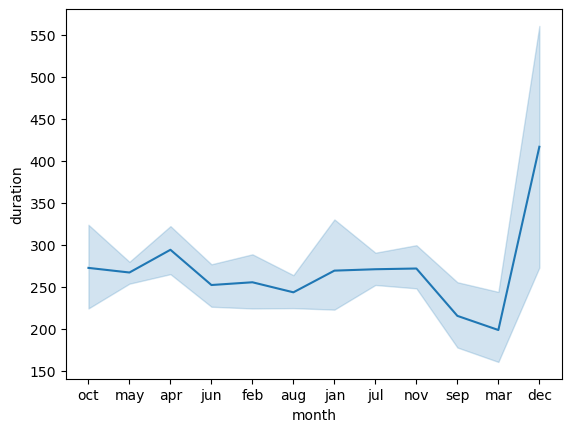

In [6]:
sns.lineplot(x = df['month'], y = df['duration'])

In [7]:
'''
1. pdays and previous these two columns shows IQR = 0, Hence we need to drop these two columns from the dataset
# Create a copy of df
data = df.copy()
data.sample(frac = 1)

SyntaxError: incomplete input (163457123.py, line 1)

In [ ]:
# Encoding Using get_dummies method
'''
Obeservation:
1. The Number of columns are increased, which impact badly w.r.t Model Building
'''
data = pd.get_dummies(data,drop_first = True, dtype = 'int')

In [ ]:
data

In [21]:
# Encoding Technique: : Label Encoder

'''
1.Independent Coumns can be encoded directly using Labelencoder
2. target column must be decoded seprately either by using replace function or map function
'''
preprocess_data = df.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Transforming all Categorical Columns: Independent columns

df(['job'] = le.fit_transform(df['job'])
df(['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['Housing'] = le.fit_transform(df['Housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])

# Transform Target Column to Numerical 

df['y'] = df['y'].replace({'yes':1, 'no':0})

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (461391478.py, line 14)

In [25]:
# Concept of Data Leackage
'''
Step 1: Split the dataset into X and y
       X : Independent Columns
       y : Target Columns

Step 2: Split the data into train and test
        train data: Seen Data
        test data : Unseen Data

Step 3: Try balance the target column in case of classification problem
        Imbalance Technique : 1. Oversampling 2. Undersampling

Step 4: Use scaling Technique:
        MinMaxScaler
        RobustScaler
        StandardScaler

Step 5: Model Building
'''

# Step 1: Split the dataset into X and y

X = df.drop(columns = ['pdays','previous', 'y'],axis = 1)
y = df['y']

# Step 2: Split the Dataset into Train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)

# Step 3: Balancing the Target Column
from imblearn.oversampling import SMOTE,ADASYN,SMOTEN
from imblearn.undersampling import ClusterCentroids

sm= ClusterCentroids(random_state= 42)
X_train,y_train = sm.fit_resample(X_train,y_train)
y_train.value_counts()

# Step 4: Scaling Techniques

sc = MinMaxScaler()
X_train = sc.Fit_transform(X_train)
X_test = sc.transform(X_test)


ModuleNotFoundError: No module named 'imblearn.oversampling'